In [5]:
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('C:\\Users\\kaush\\Desktop\\IIT SRFP\\code\\n50.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,4675.799805,4773.100098,4675.799805,4765.299805,4765.299805,0.0
1,04-01-2012,4774.950195,4782.850098,4728.850098,4749.649902,4749.649902,0.0
2,05-01-2012,4749.000000,4779.799805,4730.149902,4749.950195,4749.950195,0.0
3,06-01-2012,4724.149902,4794.899902,4686.850098,4754.100098,4754.100098,0.0
4,07-01-2012,NaN,NaN,NaN,NaN,NaN,NaN


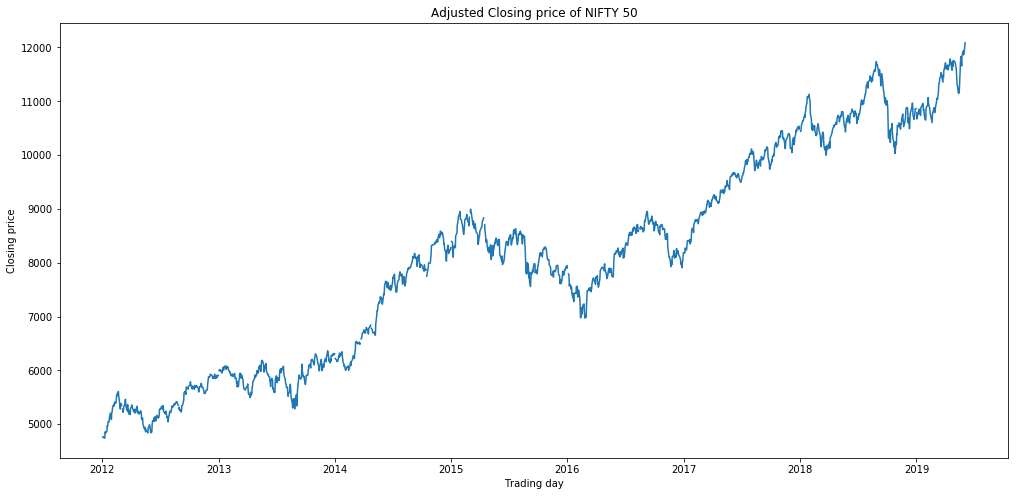

In [6]:
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.index = df['Date']

plt.figure(figsize=(17, 8))
plt.plot(df['Adj Close'])
plt.title('Adjusted Closing price of NIFTY 50')
plt.ylabel('Closing price')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

In [7]:
df.dtypes
drop_cols = ['Open','High','Low','Close','Volume']
df.drop(drop_cols, axis=1, inplace=True)
df.head()

tf= df.dropna()
tf.isnull().sum()

train = tf.loc['2012-01-02':'2019-01-01']
test = tf.loc['2019-01-01':'2019-06-01']

test.tail()

,Date,Adj Close
Date,,
2019-05-27,2019-05-27,11924.75000
2019-05-28,2019-05-28,11928.75000
2019-05-29,2019-05-29,11861.09961
2019-05-30,2019-05-30,11945.90039
2019-05-31,2019-05-31,11922.79981


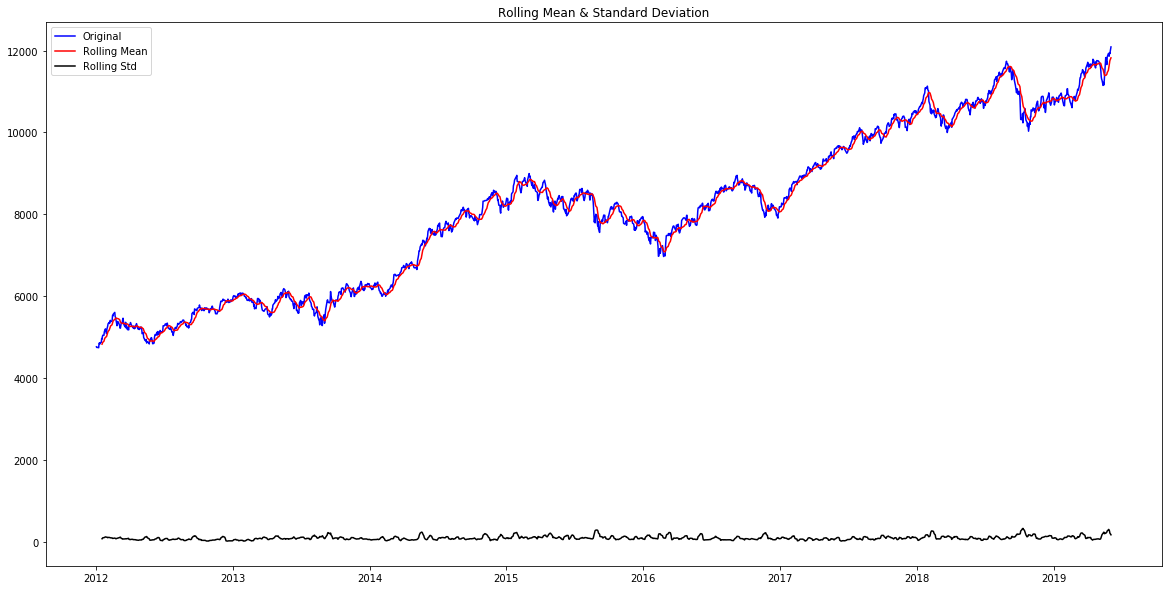

Results of Dickey-Fuller Test:
Test Statistic                   -0.460481
p-value                           0.899500
#Lags Used                        1.000000
Number of Observations Used    1810.000000
Critical Value (1%)              -3.433968
Critical Value (5%)              -2.863138
Critical Value (10%)             -2.567621
dtype: float64


In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(tf['Adj Close'])

In [51]:
from statsmodels.tsa.arima_model import ARIMA

model_arima = ARIMA(train['Adj Close'],order=(2, 1, 2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

19361.622939180605


In [52]:
predictions=[]
predictions= model_arima_fit.forecast(steps=100)[0]
predictions[:5]

array([10864.17550664, 10869.09586858, 10871.72048677, 10875.93748925,
       10879.04931522])

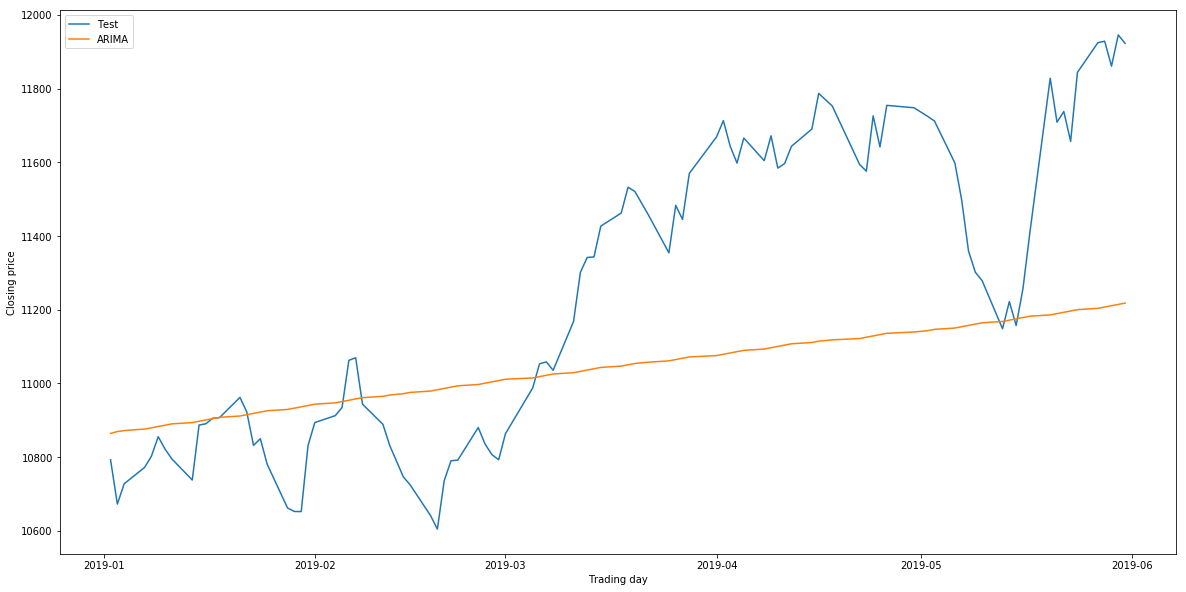

In [55]:
test['Predictions'] = 0
test['Predictions'] = predictions
plt.plot(test['Adj Close'],label='Test')
plt.plot(test['Predictions'],label='ARIMA')
plt.legend(loc='best')
plt.ylabel('Closing price')
plt.xlabel('Trading day')
plt.show()


In [56]:
rms=np.sqrt(np.mean(np.power((np.array(test['Adj Close'])-np.array(predictions)),2)))
rms

376.8427336706965

In [27]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [30]:
import warnings
warnings.filterwarnings('ignore')
x=[]
for param in pdq:
    try:
        model_arima = ARIMA(train['Adj Close'],order=param)
        model_arima_fit = model_arima.fit()
        x.append(model_arima_fit.aic)
        print(param,model_arima_fit.aic)
    except:
        continue   

(0, 0, 0) 30575.339632348117
(0, 0, 1) 28296.063439191632
(0, 1, 0) 19365.17452235735
(0, 1, 1) 19357.34693591752
(0, 1, 2) 19358.8088383502
(0, 1, 3) 19360.6864910481
(0, 1, 4) 19360.305750170177
(0, 2, 0) 20407.54336281789
(0, 2, 1) 19364.283479000384
(0, 2, 2) 19356.3139577434
(1, 0, 0) 19391.113351640557
(1, 0, 1) 19381.636996945956
(1, 0, 2) 19383.24329635492
(1, 0, 3) 19385.021157366402
(1, 0, 4) 19386.06908160313
(1, 1, 0) 19357.725566922392
(1, 1, 1) 19358.428877975693
(1, 1, 2) 19358.51075999138
(1, 2, 0) 20020.354862505792
(1, 2, 1) 19356.686129644313
(1, 2, 2) 19357.444842799083
(1, 2, 3) 19358.736734717077
(1, 2, 4) 19360.560065040965
(2, 0, 0) 19382.9225455977
(2, 0, 1) 19382.933136898
(2, 1, 0) 19358.935287178287
(2, 1, 1) 19359.631138176344
(2, 1, 2) 19361.622939180605
(2, 2, 0) 19825.357654041705
(2, 2, 1) 19357.93746671862
(2, 2, 2) 19360.318080848698
(2, 2, 3) 19361.164106379256
(2, 2, 4) 19357.32877264424
(3, 0, 0) 19384.467081159146
(3, 0, 1) 19388.124116116684
(3, 

In [31]:
print(min(x))

19351.894343297346


392.6737876321948


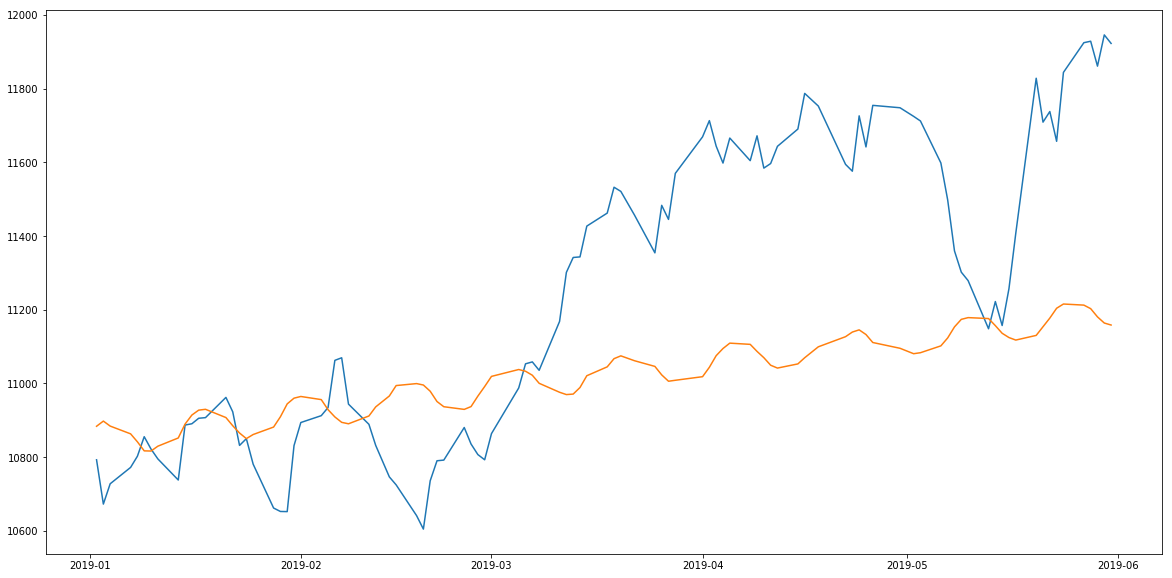

In [33]:
from statsmodels.tsa.arima_model import ARIMA

model_arima = ARIMA(train['Adj Close'],order=(4, 1, 4))
model_arima_fit = model_arima.fit()

predictions=[]
predictions= model_arima_fit.forecast(steps=100)[0]

test['Predictions'] = 0
test['Predictions'] = predictions
plt.plot(test['Adj Close'])
plt.plot(test['Predictions'])

rms=np.sqrt(np.mean(np.power((np.array(test['Adj Close'])-np.array(predictions)),2)))
print(rms)